In [1]:
pip install --user statsmodel

ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline



In [3]:
labor = pd.read_csv("/Users/xiaolongl/Downloads/Feb2019_labor_market_majors.csv",skiprows = 13, skipfooter = 3)

<ipython-input-3-6cf9ec095edc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  labor = pd.read_csv("/Users/xiaolongl/Downloads/Feb2019_labor_market_majors.csv",skiprows = 13, skipfooter = 3)


In [4]:
labor

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
0,Agriculture,3.1,53.9,"40,000","60,000",20.8
1,Animal and Plant Sciences,3.0,57.4,"35,000","60,000",34.8
2,Environmental Studies,4.6,49.3,"36,000","65,000",32.2
3,Architecture,4.3,26.6,"45,000","75,000",37.4
4,Ethnic Studies,5.7,50.1,"38,000","57,000",49.4
...,...,...,...,...,...,...
68,Finance,3.5,37.0,"52,000","85,000",30.5
69,International Affairs,4.7,49.7,"45,000","75,000",42.6
70,History,4.1,53.1,"36,000","66,000",49.4
71,Engineering Technologies,5.3,40.9,"50,000","80,000",24.3


In [5]:
labor.columns = ["major","unemployment","underemployment","early","mid","graduate"]

In [6]:
labor["early"] = labor["early"].str.replace(",","").astype(float)
labor["mid"] = labor["mid"].str.replace(",","").astype(float)

In [7]:
labor.head()

,major,unemployment,underemployment,early,mid,graduate
0,Agriculture,3.1,53.9,40000.0,60000.0,20.8
1,Animal and Plant Sciences,3.0,57.4,35000.0,60000.0,34.8
2,Environmental Studies,4.6,49.3,36000.0,65000.0,32.2
3,Architecture,4.3,26.6,45000.0,75000.0,37.4
4,Ethnic Studies,5.7,50.1,38000.0,57000.0,49.4


Text(0, 0.5, 'Median Wage Mid-Career')

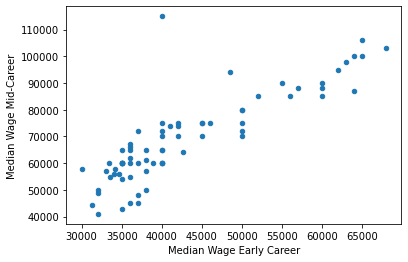

In [8]:
labor.plot.scatter(x = "early", y = "mid")
plt.xlabel("Median Wage Early Career")
plt.ylabel("Median Wage Mid-Career")

In [9]:
lm = smf.ols(formula = 'mid ~ early', data = labor).fit()

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mid   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     181.7
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           2.98e-21
Time:                        16:55:37   Log-Likelihood:                -765.31
No. Observations:                  73   AIC:                             1535.
Df Residuals:                      71   BIC:                             1539.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.014e+04   4498.265      2.254      0.027    1168.816    1.91e+04
early          1.3762      0.102     13.478      0.000       1.173       1.580
==============================================================================
Omnibus:                       64.069   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              593.324
Skew:                           2.370   Prob(JB):                    1.45e-129
Kurtosis:                      16.137   Cond. No.                     1.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
lm.params

Intercept    10138.101598
early            1.376232
dtype: float64

Text(0, 0.5, 'Median Wage Mid-Career')

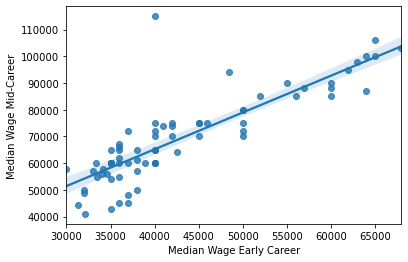

In [12]:


sns.regplot(x = 'early',y = 'mid', data = labor)
plt.xlabel("Median Wage Early Career")
plt.ylabel("Median Wage Mid-Career")



In [13]:
lm.resid


0     -5187.363306
1      1693.794408
2      5317.562865
3      2931.478981
4     -5434.900221
          ...     
68     3297.858182
69     2931.478981
70     6317.562865
71     1050.321267
72    10941.331322
Length: 73, dtype: float64

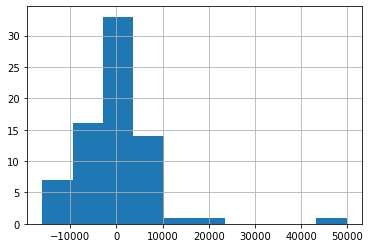

In [14]:
lm.resid.hist()

In [15]:
labor.iloc[labor["mid"].idxmax()]

major              Pharmacy
unemployment            3.7
underemployment        28.7
early                 40000
mid                  115000
graduate               58.8
Name: 61, dtype: object